# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data 
Data set ini  


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


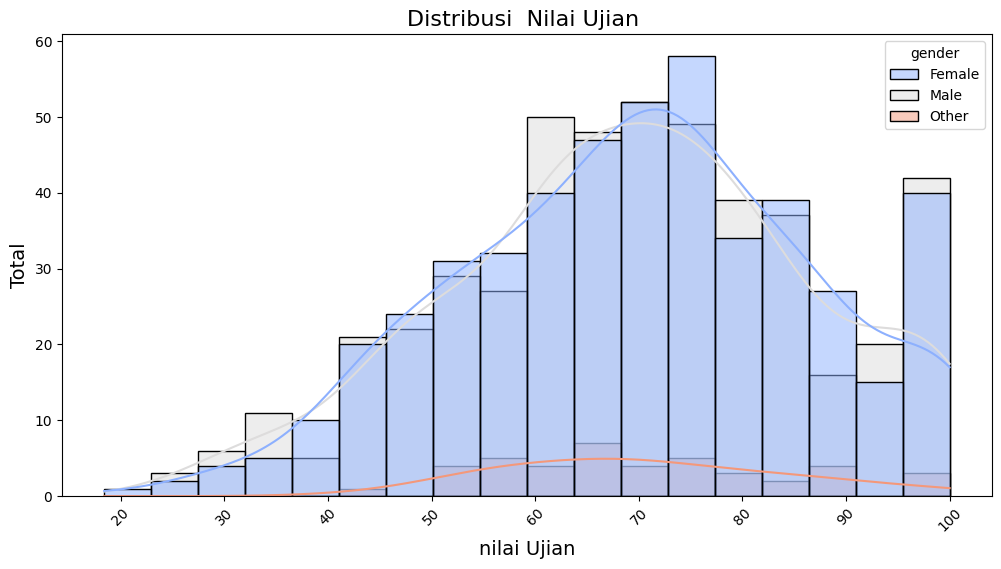

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, 
             x='exam_score', 
             hue='gender', 
             kde=True, 
             palette='coolwarm'
            )
plt.title('Distribusi  Nilai Ujian ', fontsize=16)
plt.xlabel('nilai Ujian', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=45);

Dari distribusi sebaran nilai diatas, terliha kebanyakan  rentang nilai terdapat di kisaran 60-70.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24')])

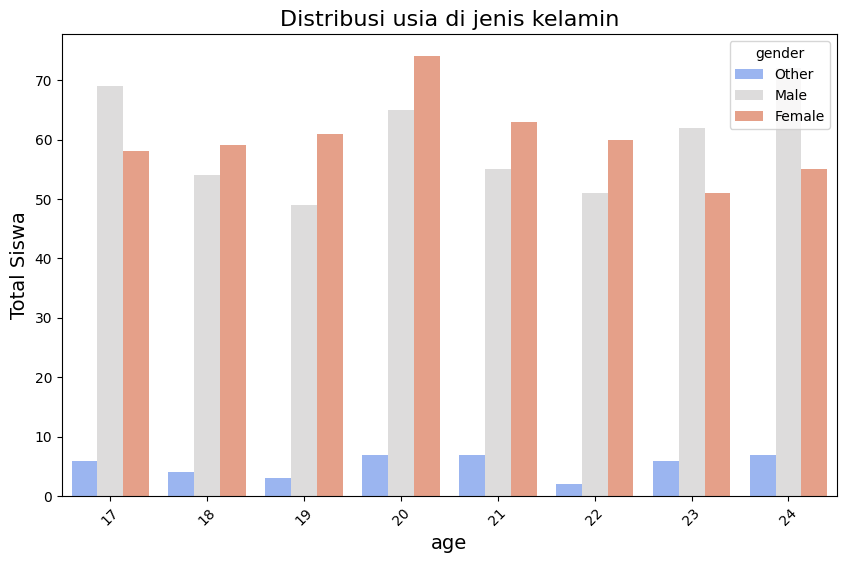

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['age'], 
              hue=df['gender'], 
              palette='coolwarm'
             )
plt.title('Distribusi usia di jenis kelamin', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Total Siswa', fontsize=14)
plt.xticks(rotation=45)

dari sebaran usia terlihat dari usia didominasi oleh perempuan


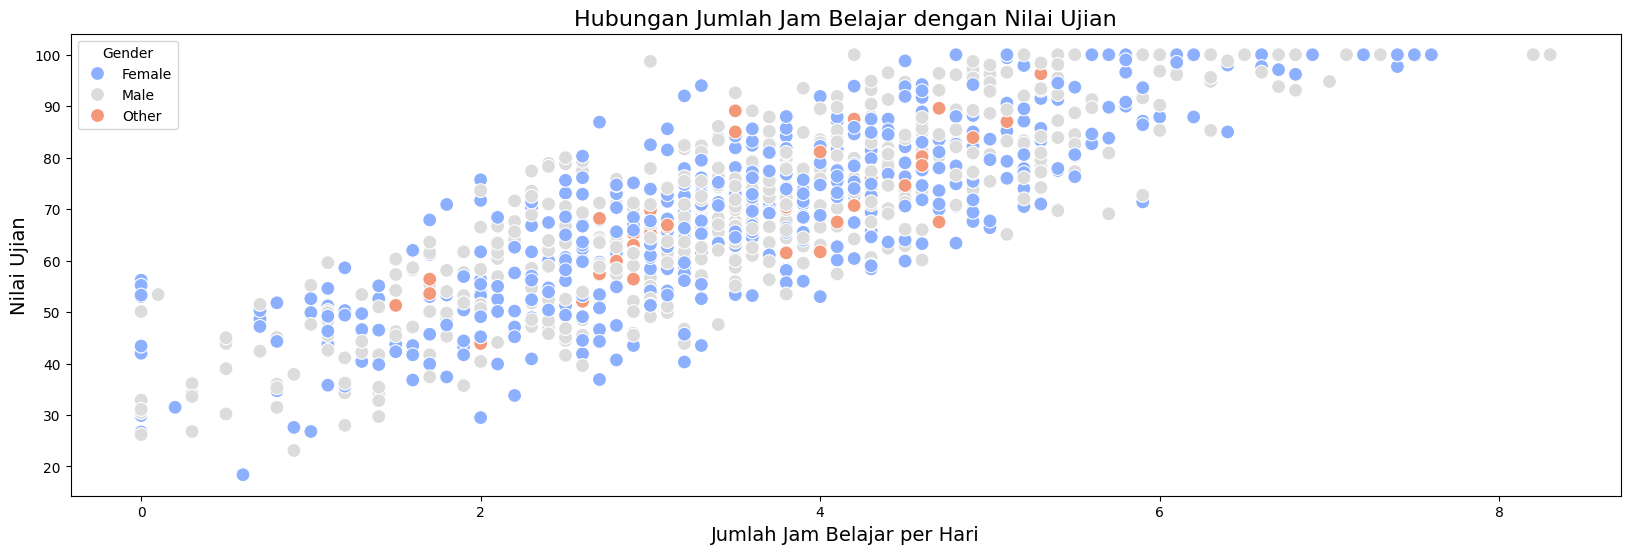

In [7]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender', palette='coolwarm', s=100)
plt.title('Hubungan Jumlah Jam Belajar dengan Nilai Ujian', fontsize=16)
plt.xlabel('Jumlah Jam Belajar per Hari', fontsize=14)
plt.ylabel('Nilai Ujian', fontsize=14)
plt.legend(title='Gender')
plt.show()

Berdasarkan plot jam studi diatas, kita dapat melihat bahwa jam studi punya peran cukup penting terhadap nilai_examp


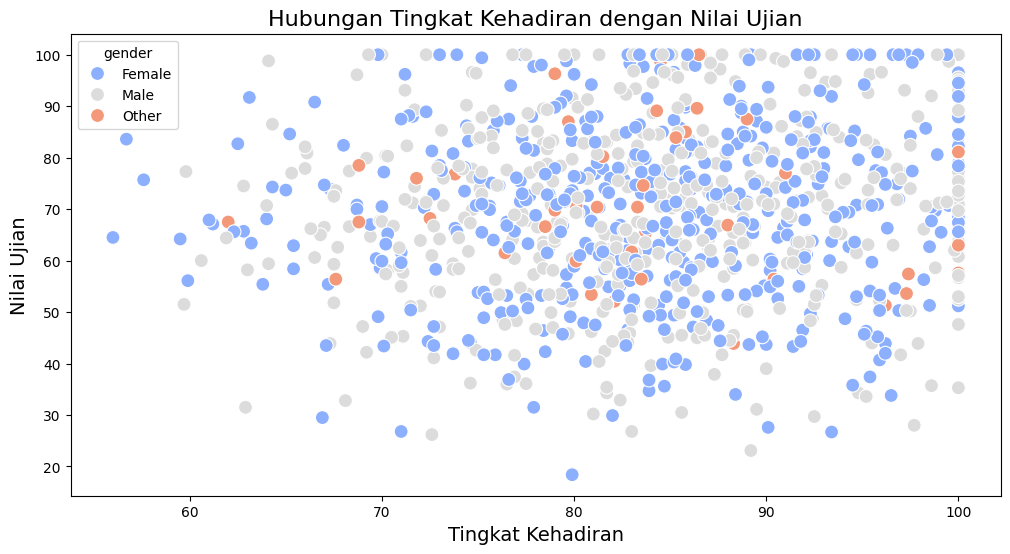

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, 
                x='attendance_percentage',y='exam_score',
                hue='gender',
                palette='coolwarm',s=100)
plt.title('Hubungan Tingkat Kehadiran dengan Nilai Ujian', fontsize=16)
plt.xlabel('Tingkat Kehadiran', fontsize=14)    
plt.ylabel('Nilai Ujian', fontsize=14)
plt.legend 
plt.show()

Berdasarkan hasils scatter plot diatas, korelasi kehadiran dan nilai_examp cukup tinggi juga.

<Figure size 1600x1000 with 0 Axes>

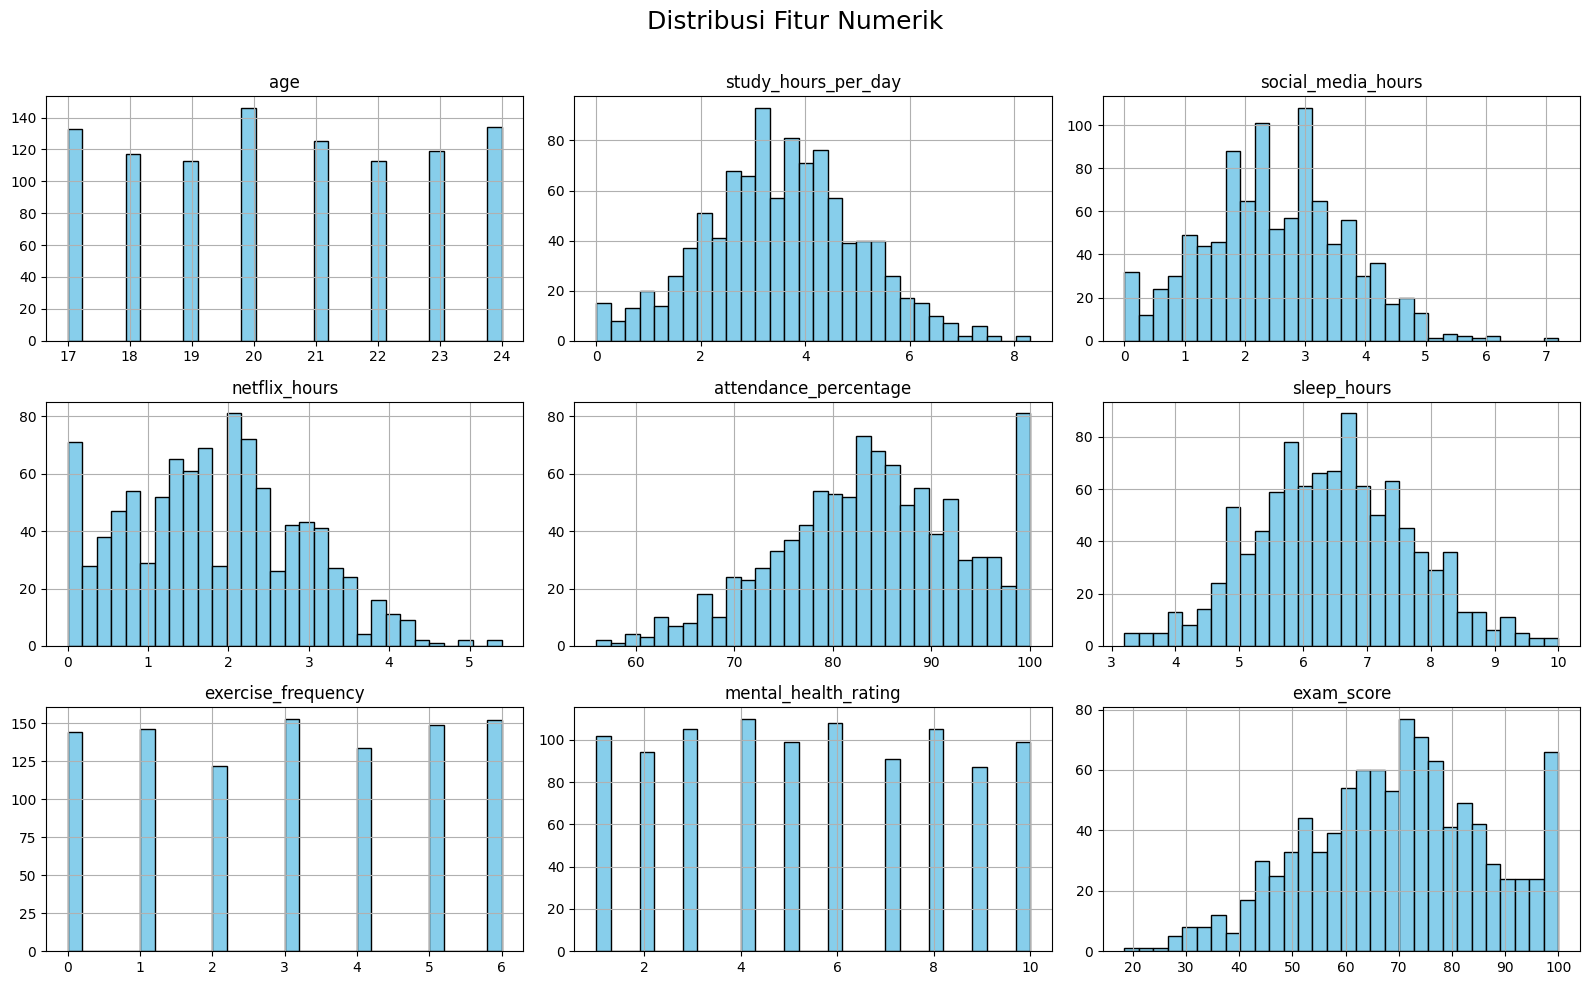

In [9]:
numeric_features = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(16, 10))
df[numeric_features].hist(bins=30, figsize=(16, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Visualisasi ini memberikan gambaran menyeluruh bahwa mayoritas mahasiswa memiliki kebiasaan belajar dan tidur yang seimbang, kehadiran tinggi, serta skor ujian yang cenderung baik. Namun, penggunaan media sosial dan Netflix yang signifikan serta frekuensi olahraga yang ekstrem menunjukkan potensi faktor yang bisa berdampak pada performa akademik maupun kesehatan mental.

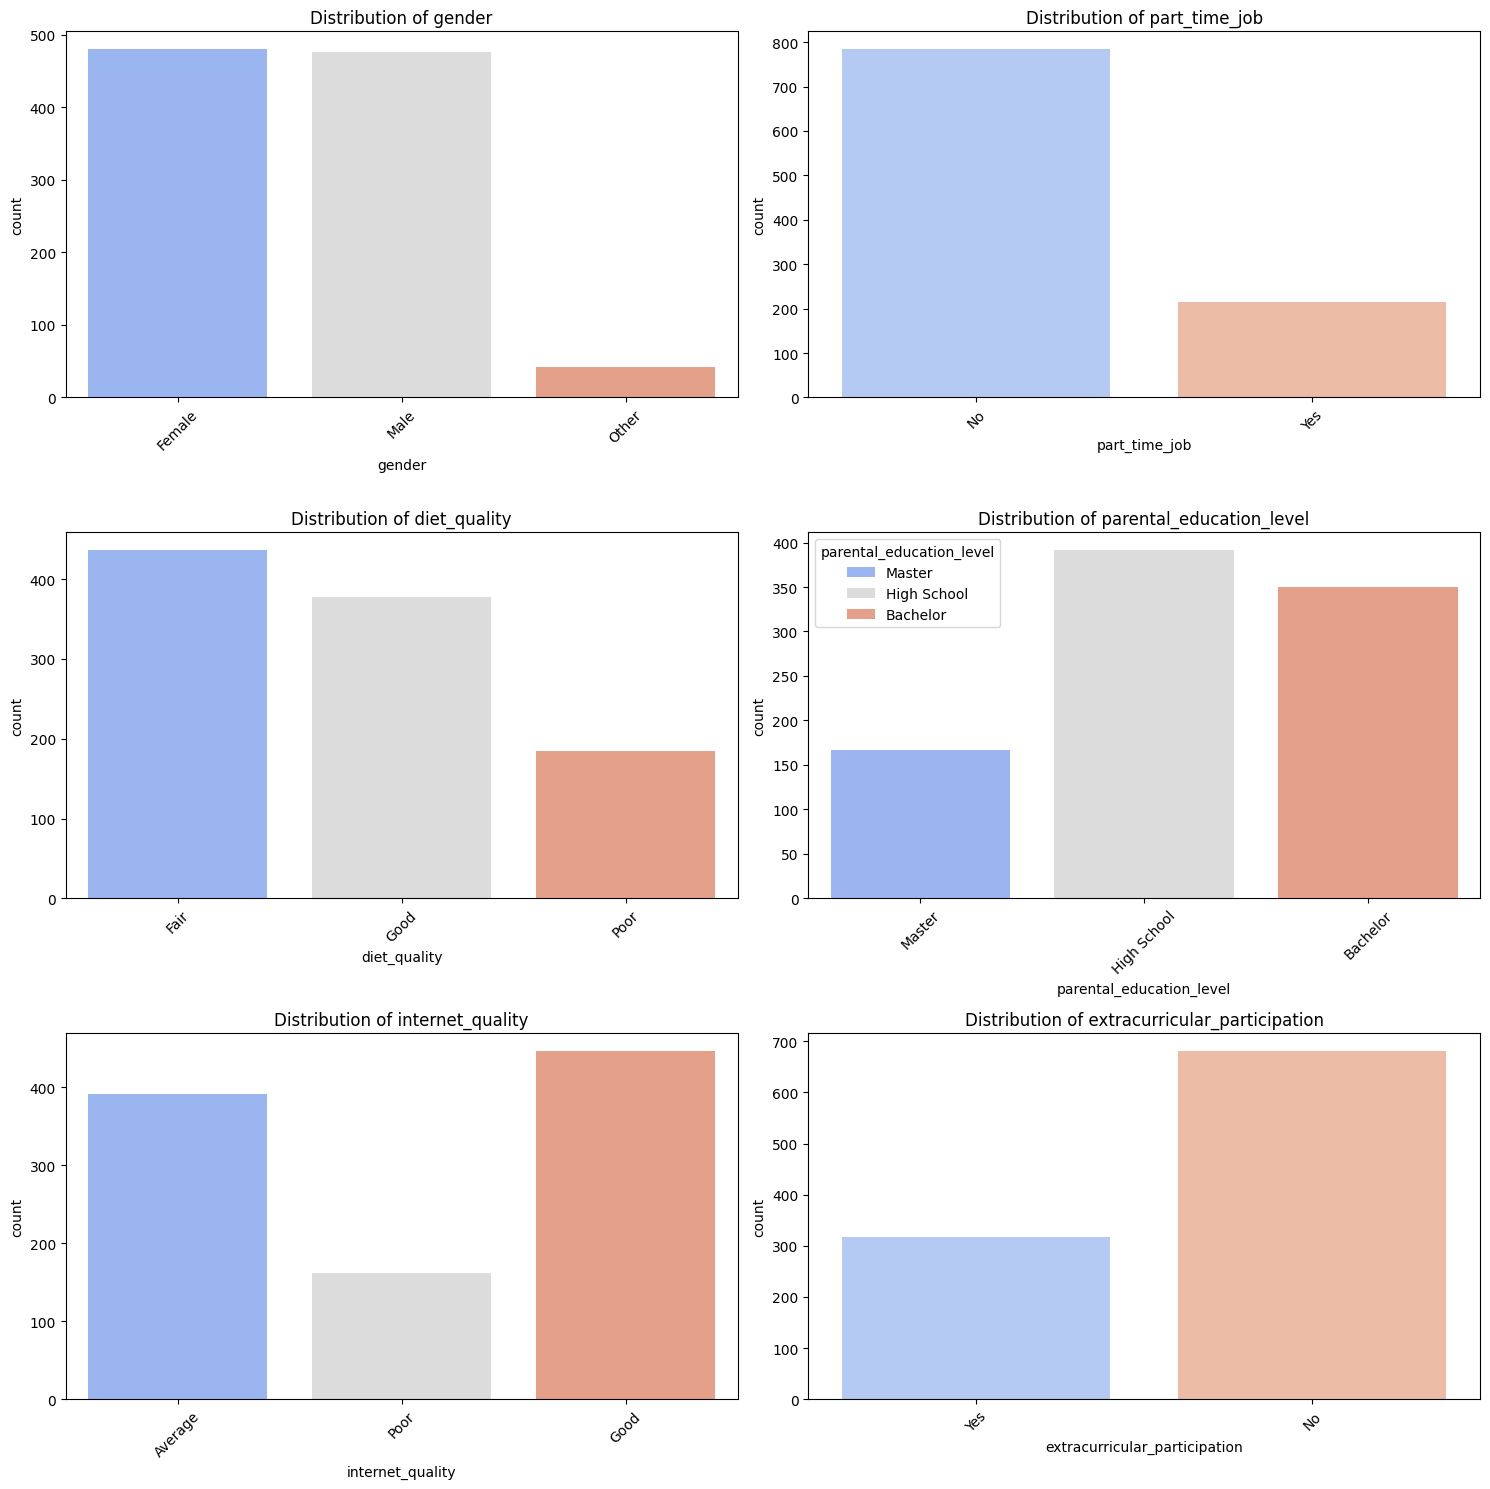

In [10]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('student_id')  # Exclude non-categorical feature
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    if idx < len(axes):
        sns.countplot(data=df, x=col, ax=axes[idx], hue=col, palette='coolwarm')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan bahwa sebagian besar mahasiswa memiliki kondisi hidup yang cukup stabil dari segi akses internet, pendidikan orang tua, dan pola makan. Namun, minimnya partisipasi ekstrakurikuler serta ketidakseimbangan dalam kualitas internet dan diet tetap menjadi catatan penting dalam analisis lebih lanjut terhadap kinerja akademik mereka.

Text(0.5, 1.0, 'Korelasi antar Fitur Numerik')

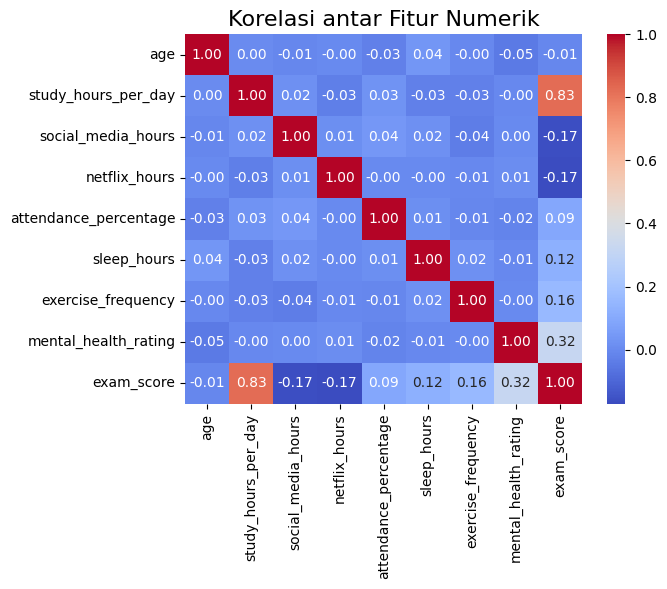

In [11]:
numeric_features = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur Numerik', fontsize=16)  

Dari heatmap korelasi ini, kita dapat menyimpulkan bahwa durasi belajar harian merupakan prediktor terkuat terhadap pencapaian nilai ujian mahasiswa. Diikuti oleh faktor-faktor seperti kesehatan mental dan kebugaran fisik, yang juga memberi kontribusi positif meski tidak sebesar waktu belajar. Sebaliknya, waktu yang dihabiskan untuk hiburan digital (seperti Netflix dan media sosial) berkorelasi negatif dengan nilai ujian, mengindikasikan potensi dampak buruk terhadap kinerja akademik.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
#cek missing values
missing_values = df.isnull().sum()
missing_values
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 parental_education_level    91
dtype: int64


terdapat 91 missing value pada kolom parental education

In [13]:
#imputasi dengan modus (mode)

mode_parental_education = df['parental_education_level'].mode()[0]
df['parental_education_level'].fillna(mode_parental_education, inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


Untuk menangani missing value pada fitur parental_education_level, saya menerapkan teknik imputasi dengan modus, artinya nilai yang kosong tadi akan diisi dengan value yang sering muncul pada fitur tersebu.

In [14]:
#cek duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 0


tidak terdapat data yang duplikat

In [15]:
# Perform one-hot encoding on categorical features
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                   'internet_quality', 'extracurricular_participation']

# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows and shape of the encoded dataframe
print("Shape of encoded dataframe:", df_encoded.shape)
print("\nFirst few columns of encoded dataframe:")
print(df_encoded.columns.tolist())

Shape of encoded dataframe: (1000, 20)

First few columns of encoded dataframe:
['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_High School', 'parental_education_level_Master', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_Yes']


In [16]:
#menghapus kolom yang tidak diperlukan
df_encoded.drop(columns=['student_id','age'], inplace=True)

menghapus kolom student_id dan age karna tingkat korelasinya sangat kecil dengn nilai siswa

In [17]:
# Separate features and target
X = df_encoded.drop('exam_score', axis=1)
y = df_encoded['exam_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 17)
Testing set shape: (200, 17)


Memisahkan fitur dan target serta membagi data training dan data testing dengan perbandingan 80:20 